<a href="https://colab.research.google.com/github/d4rk3dge/iitm_hackathon/blob/main/trends_recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop

In [82]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


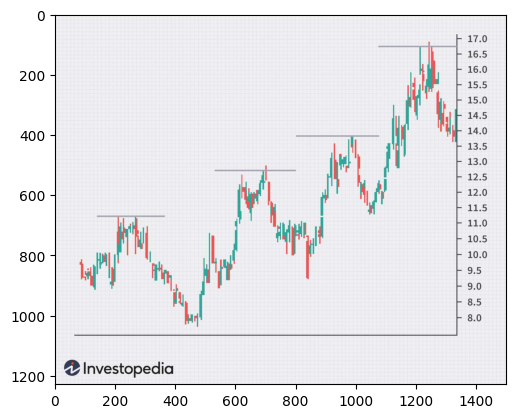

In [83]:
img = image.load_img("/content/drive/MyDrive/iitm hackathon/basedata/training/Invest/1 - Copy (2).jpg")
plt.imshow(img)

In [84]:
cv2.imread("/content/drive/MyDrive/iitm hackathon/basedata/training/Invest/1 - Copy (2).jpg")

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[238, 233, 234],
        [242, 237, 238],
        [245, 240, 241],
        ...,
        [243, 238, 239],
        [243, 238, 239],
        [243, 238, 239]],

       [[236, 231, 232],
        [240, 235, 236],
        [243, 238, 239],
        ...,
        [241, 236, 237],
        [241, 236, 237],
        [241, 236, 237]],

       [[233, 228, 229],
        [236, 231, 232],
        [239, 234, 235],
        ...,
        [237, 232, 233],
        [237, 232, 233],
        [237, 232, 233]]

In [85]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [86]:
train_datasest = train.flow_from_directory('/content/drive/MyDrive/iitm hackathon/basedata/training',
                                           target_size=(200,200),
                                           batch_size = 10,
                                           class_mode = 'sparse')

validation_datasest = train.flow_from_directory('/content/drive/MyDrive/iitm hackathon/basedata/validation',
                                           target_size=(200,200),
                                           batch_size = 10,
                                           class_mode = 'binary')

Found 18 images belonging to 2 classes.
Found 9 images belonging to 2 classes.


In [87]:
train_datasest.class_indices

{'Invest': 0, 'withdrawl': 1}

In [88]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Replace num_classes with the actual number of classes
])


In [89]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics = ['accuracy'])

In [92]:
import numpy as np

# Assuming train_datasest is your DirectoryIterator for training data
total_train_samples = train_datasest.samples
batch_size = train_datasest.batch_size
steps_per_epoch = np.ceil(total_train_samples / batch_size)

# Similarly, calculate steps per epoch for the validation dataset
total_val_samples = validation_datasest.samples
val_steps_per_epoch = np.ceil(total_val_samples / batch_size)

# Use these values in model.fit
model_fit = model.fit(train_datasest,
                      steps_per_epoch=steps_per_epoch,
                      epochs=30,
                      validation_data=validation_datasest,
                      validation_steps=val_steps_per_epoch)


Epoch 1/30
2/2 [==============================] - 2s 1s/step - loss: 0.4956 - accuracy: 0.9444 - val_loss: 0.4088 - val_accuracy: 1.0000
Epoch 2/30
2/2 [==============================] - 2s 786ms/step - loss: 1.7775 - accuracy: 0.6667 - val_loss: 0.8238 - val_accuracy: 0.4444
Epoch 3/30
2/2 [==============================] - 2s 834ms/step - loss: 0.6326 - accuracy: 0.7778 - val_loss: 0.4887 - val_accuracy: 1.0000
Epoch 4/30
2/2 [==============================] - 2s 833ms/step - loss: 0.4178 - accuracy: 1.0000 - val_loss: 0.3592 - val_accuracy: 1.0000
Epoch 5/30
2/2 [==============================] - 2s 1s/step - loss: 0.6548 - accuracy: 0.6667 - val_loss: 0.6313 - val_accuracy: 0.5556
Epoch 6/30
2/2 [==============================] - 3s 1s/step - loss: 0.5152 - accuracy: 0.7778 - val_loss: 0.2959 - val_accuracy: 1.0000
Epoch 7/30
2/2 [==============================] - 2s 858ms/step - loss: 0.2317 - accuracy: 1.0000 - val_loss: 0.1488 - val_accuracy: 1.0000
Epoch 8/30
2/2 [=============

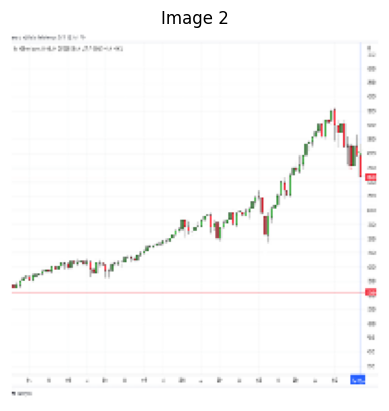

1/1 [==============================] - 0s 38ms/step
You can Invest in the stocks


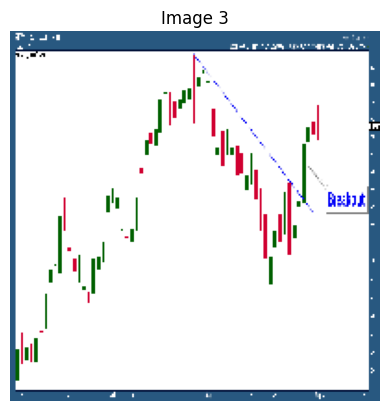

1/1 [==============================] - 0s 45ms/step
You can Invest in the stocks


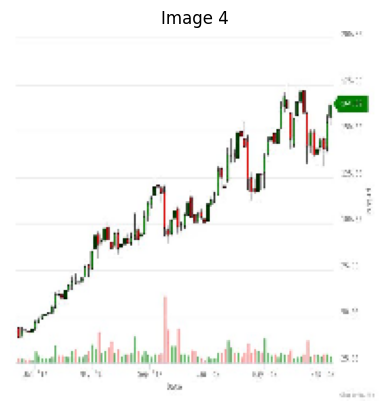

1/1 [==============================] - 0s 36ms/step
You can Invest in the stocks


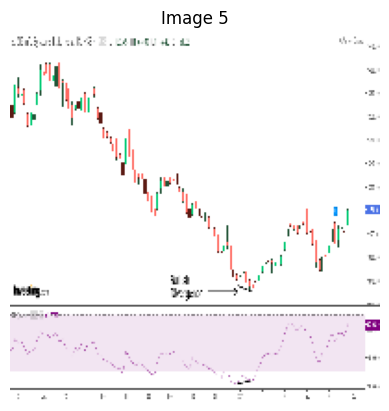

1/1 [==============================] - 0s 36ms/step
You can Invest in the stocks


In [100]:
import os
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

dir_path = '/content/drive/MyDrive/iitm hackathon/basedata/Invest'

# Display the first few images in the directory
for i, filename in enumerate(os.listdir(dir_path)):
    if i >= 5:  # Display only the first 5 images for example
        break

    img_path = os.path.join(dir_path, filename)

    # Check if it's a file (not a directory)
    if os.path.isfile(img_path):
        img = image.load_img(img_path,target_size=(200,200))

        plt.imshow(img)
        plt.title(f"Image {i+1}")
        plt.axis('off')  # Turn off axis labels
        plt.show()

        x = image.img_to_array(img)
        x = np.expand_dims(x,axis=0)
        images = np.vstack(([x]))
        val=model.predict(images)
        if val==0:
          print("You can Invest in the stocks")
        else:
          print("Investing might be risky at the moment")

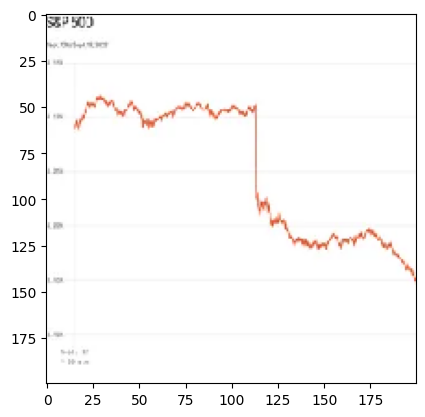

1/1 [==============================] - 0s 69ms/step
Investing might be risky at the moment


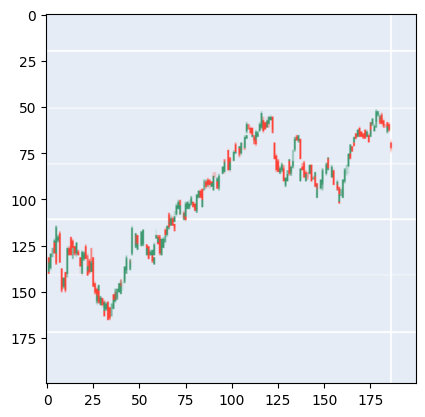

1/1 [==============================] - 0s 62ms/step
You can Invest in the stocks


In [105]:
dir_path = '/content/drive/MyDrive/iitm hackathon/basedata/test'
for i in os.listdir(dir_path):
  img=image.load_img(dir_path+'//'+ i, target_size=(200,200))
  plt.imshow(img)
  plt.show()

  x = image.img_to_array(img)
  x = np.expand_dims(x,axis=0)
  images = np.vstack(([x]))
  val=model.predict(images)
  if val==0:
    print("You can Invest in the stocks")
  else:
    print("Investing might be risky at the moment")